In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv('Chicago_Crimes_2018.csv')

In [3]:
# rows and columns
df.shape
# https://note.nkmk.me/en/python-pandas-len-shape-size/

(265698, 22)

In [4]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.656980e+05,265698.000000,265698.000000,265695.000000,265696.000000,2.636030e+05,2.636030e+05,265698.0,263603.000000,263603.000000
mean,1.135067e+07,1142.224590,11.193735,23.439609,36.469774,1.165009e+06,1.886592e+06,2018.0,41.844396,-87.669977
std,5.375518e+05,696.079873,6.952656,14.094161,21.454410,1.603617e+04,3.118507e+04,0.0,0.085756,0.058385
min,2.375700e+04,111.000000,1.000000,1.000000,0.000000,1.092706e+06,1.813897e+06,2018.0,41.644590,-87.934273
25%,1.128604e+07,611.000000,6.000000,10.000000,23.000000,1.153334e+06,1.859421e+06,2018.0,41.769663,-87.712383
50%,1.137493e+07,1031.000000,10.000000,24.000000,32.000000,1.166911e+06,1.894241e+06,2018.0,41.865575,-87.663280
75%,1.146394e+07,1723.000000,17.000000,35.000000,53.000000,1.176461e+06,1.908735e+06,2018.0,41.905324,-87.627842
max,1.160129e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951535e+06,2018.0,42.022671,-87.524529


In [5]:
sns.set_style('darkgrid')

In [6]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11268908,JB202456,03/28/2018 07:50:00 AM,004XX W DIVISION ST,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,27.0,8.0,06,1173175.0,1908290.0,2018,02/20/2019 04:21:43 PM,41.903776,-87.639324,"(41.903775756, -87.639324074)"
1,11210587,JB124894,01/22/2018 12:10:00 AM,0000X E CHESTNUT ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,2.0,8.0,02,1176408.0,1906333.0,2018,02/20/2019 04:21:43 PM,41.898333,-87.627508,"(41.898333269, -87.62750777)"
2,11207682,JB120881,01/18/2018 04:50:00 PM,006XX N LECLAIRE AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,37.0,25.0,04B,1142252.0,1903601.0,2018,02/20/2019 04:21:43 PM,41.891539,-87.753029,"(41.891538918, -87.753028938)"
3,11599687,JC157279,12/24/2018 09:00:00 AM,011XX W 15TH ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,...,11.0,28.0,11,NaN,NaN,2018,02/19/2019 04:22:18 PM,NaN,NaN,NaN
4,11599643,JC157354,12/18/2018 10:00:00 AM,007XX E 89TH PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,OTHER,False,True,...,8.0,44.0,26,NaN,NaN,2018,02/19/2019 04:22:18 PM,NaN,NaN,NaN


In [7]:
# Clean data
# The simplest cleaning technique here would be to drop all the rows with at least one missing value
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262960 entries, 0 to 265696
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    262960 non-null  int64  
 1   Case Number           262960 non-null  object 
 2   Date                  262960 non-null  object 
 3   Block                 262960 non-null  object 
 4   IUCR                  262960 non-null  object 
 5   Primary Type          262960 non-null  object 
 6   Description           262960 non-null  object 
 7   Location Description  262960 non-null  object 
 8   Arrest                262960 non-null  bool   
 9   Domestic              262960 non-null  bool   
 10  Beat                  262960 non-null  int64  
 11  District              262960 non-null  int64  
 12  Ward                  262960 non-null  float64
 13  Community Area        262960 non-null  float64
 14  FBI Code              262960 non-null  object 
 15  

In [8]:
# How much of the data has been retained after this removal)
print(round(262960 / 265698 * 100,2), "percentage of the data has been retained.")

98.97 percentage of the data has been retained.


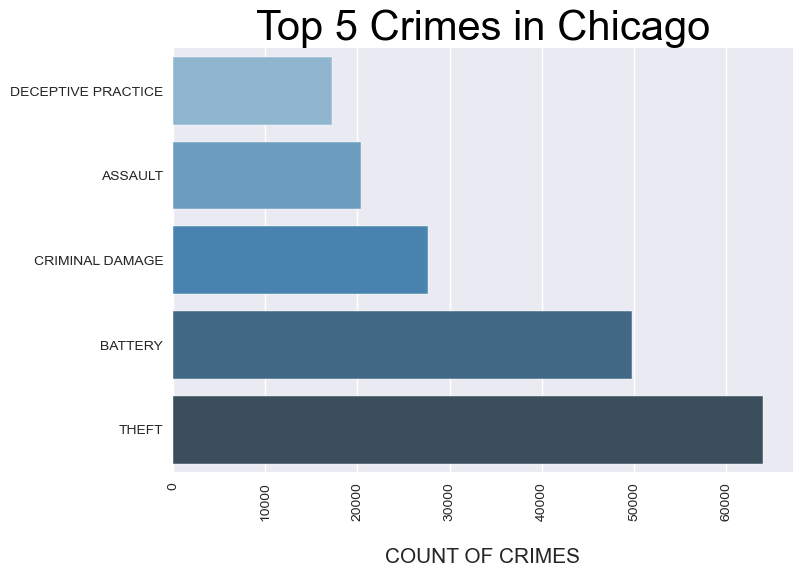

In [9]:
# Set the style of the plot first
plt.style.use('seaborn')

# Filter out the Top 5 crimes
top_5_crimes = df['Primary Type'].value_counts().sort_values(ascending=False).head()

temp = df.groupby('Primary Type', as_index=False).agg({"ID": "count"})
temp = temp.sort_values(by=['ID'], ascending=False).head()
temp = temp.sort_values(by='ID', ascending=True)
sns.barplot(x='ID', y='Primary Type', data=temp, palette="Blues_d")

# Work on the aestehtic appeal of the plot
plt.title("Top 5 Crimes in Chicago", fontdict = {'fontsize': 30, 'fontname':'Arial', 'color': '#000000'})
plt.xlabel("\nCOUNT OF CRIMES", fontdict = {'fontsize': 15})
plt.ylabel("")
plt.xticks(rotation=90)
plt.show()

In [10]:
# Time Conversion Function
def time_convert(date_time):
    s1 = date_time[:11]
    s2 = date_time[11:]
    
    month = s1[:2]
    date = s1[3:5]
    year = s1[6:10]
    
    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'
    
    final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
    return final_date

In [11]:
# Using apply() of pandas to apply time_convert on every row of the Date column
df['Date'] = df['Date'].apply(time_convert)

In [12]:
def month(x):
    return x.strftime("%B")
df['Month'] = df['Date'].apply(month)

In [13]:
# Frequency of the most occuring crimes over the year 2018

theft_dict ={} # dictionary
battery_dict = {}
crim_dam = {}
assault = {}
dec_prac = {}

months = df["Month"].unique()
for month in months :
    theft_dict[month]=0
    battery_dict[month]=0
    crim_dam[month]=0
    assault[month]=0
    dec_prac[month]=0

for elem in df[df["Primary Type"]=="THEFT"]["Month"]:
    if elem in theft_dict.keys():
        theft_dict[elem] += 1

for elem in df[df["Primary Type"]=="BATTERY"]["Month"]:
    if elem in battery_dict.keys():
        battery_dict[elem] += 1
        
for elem in df[df["Primary Type"]=="CRIMINAL DAMAGE"]["Month"]:
    if elem in crim_dam.keys():
        crim_dam[elem] += 1
        
for elem in df[df["Primary Type"]=="ASSAULT"]["Month"]:
    if elem in assault.keys():
        assault[elem] += 1
        
for elem in df[df["Primary Type"]=="DECEPTIVE PRACTICE"]["Month"]:
    if elem in dec_prac.keys():
        dec_prac[elem] += 1
        
        
# Let's order the above dictionaries for proper plotting
months=['January','February','March','April','May','June','July','August','September','October','November','December']
theft_list = [(k,theft_dict[k]) for k in months]
battery_list = [(k,battery_dict[k]) for k in months]
crim_dam_list = [(k,crim_dam[k]) for k in months]
assault_list = [(k,assault[k]) for k in months]
dec_prac_list = [(k,dec_prac[k]) for k in months]

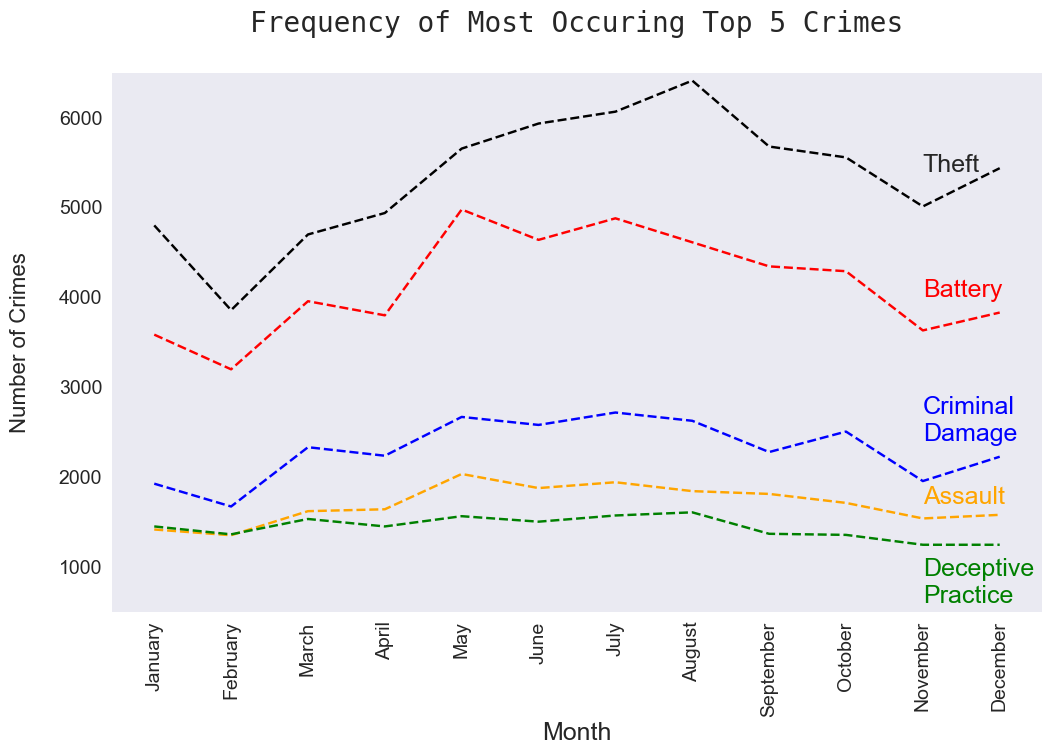

In [14]:
# Plotting the graphs

plt.style.use('seaborn-dark')
#sns.set(rc={'axes.facecolor':'A0D7E6', 'figure.facecolor':'ffffff'})
fig, ax = plt.subplots(figsize=(12,7))

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

# Setting the ticks only on the bottom and the left of the graph
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(500, 6500)

x = [z[0] for z in theft_list]
# print(x)
y = [z[1] for z in theft_list]
ax.plot(x,y, color="black")
ax.lines[0].set_linestyle("--")

x = [z[0] for z in battery_list]
y = [z[1] for z in battery_list]
ax.plot(x,y, color="red")
ax.lines[1].set_linestyle("--")

x = [z[0] for z in crim_dam_list]
y = [z[1] for z in crim_dam_list]
ax.plot(x,y, color="blue")
ax.lines[2].set_linestyle("--")

x = [z[0] for z in assault_list]
y = [z[1] for z in assault_list]
ax.plot(x,y, color="orange")
ax.lines[3].set_linestyle("--")

# x,y = zip(*dec_prac.items())
x = [z[0] for z in dec_prac_list]
y = [z[1] for z in dec_prac_list]
ax.plot(x,y, color="green")
ax.lines[4].set_linestyle("--")


for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
plt.text(10,5400,"Theft",fontsize=18)
plt.text(10,4000,"Battery",fontsize=18,color="red")
plt.text(10,2400,"Criminal\nDamage",fontsize=18,color="blue")
plt.text(10,1700,"Assault",fontsize=18,color="orange")
plt.text(10,600,"Deceptive\nPractice",fontsize=18,color="green")

ax.set_title("Frequency of Most Occuring Top 5 Crimes\n",fontname="monospace", fontsize=20)
ax.set_xlabel("Month", fontsize=18)
ax.set_ylabel("Number of Crimes\n", fontsize=16)
    
plt.show()

In [15]:
#Arrests and the state of Chicago

# If you do a crime in Chicago what is the chance of arrest?
# df['Arrest'].head()
l = df["Arrest"].value_counts()
false = l[0]
true = l[1]

arrest = pd.DataFrame({'Status':['Not Arrested','Arrested'],'Value':list(l)})
print("Percentage of no arrests of all reported crimes :",false/(false+true)*100,'!')

Percentage of no arrests of all reported crimes : 80.16352296927289 !


findfont: Font family ['Agency FB'] not found. Falling back to DejaVu Sans.


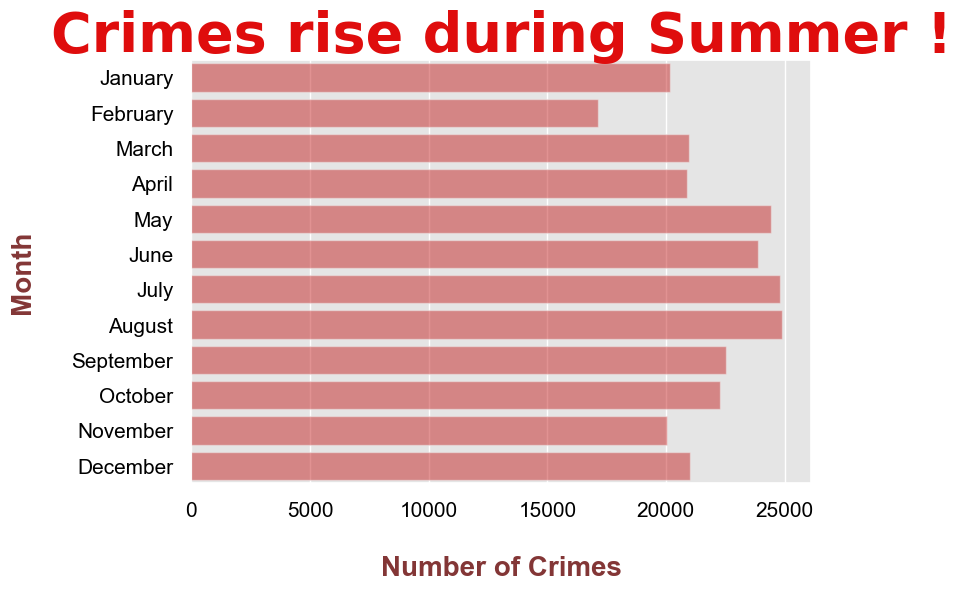

In [16]:
# Set plot style
plt.style.use('ggplot')
sns.set_context('notebook')

# Code to plot
sns.countplot(y='Month', data=df, palette=["#DF0D0D"], order=['January', 'February', 'March', 'April', 'May', 'June', "July", 'August', 'September', 'October', 'November', 'December'], alpha=0.5)

# Aesthetic appeal of the plot 
plt.title("Crimes rise during Summer !", fontdict={'fontsize': 40, 'color': '#DF0D0D', 'fontname':'Agency FB'}, weight="bold")
plt.ylabel("Month\n", fontdict={'fontsize': 20}, weight="bold", color="#833636")
plt.xlabel("\nNumber of Crimes", fontdict={'fontsize': 20}, weight="bold", color="#833636")

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15, color='black')
plt.show()

In [17]:
def hour(x):
    return x.strftime("%H")
df['Hour_Day'] = df['Date'].apply(hour)

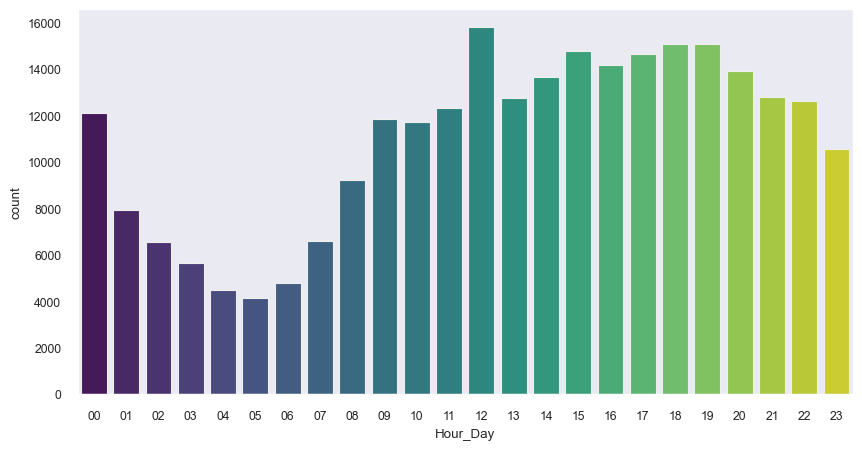

In [18]:
# Set plot style
plt.style.use('seaborn-dark')
sns.set_context('paper')

# Write code to plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Hour_Day', data=df, palette="viridis", order=['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])

plt.show()

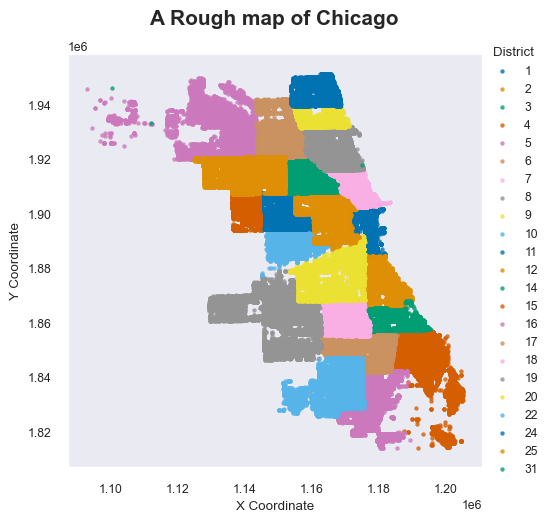

In [19]:
# Plot of Chicago
# Let's simulate the map of Chicago with the help of X and Y co-ordinates
sns.lmplot(x='X Coordinate', 
           y='Y Coordinate', data=df, fit_reg=False, 
           hue="District",
           palette='colorblind',
           height=5,
           scatter_kws={"marker": "+", 
                        "s": 10})
ax = plt.gca()
ax.set_title("A Rough map of Chicago\n", fontdict={'fontsize': 15}, weight="bold")
plt.show()

Enter the crime you wish to see the concentration of in the city >> narcotics


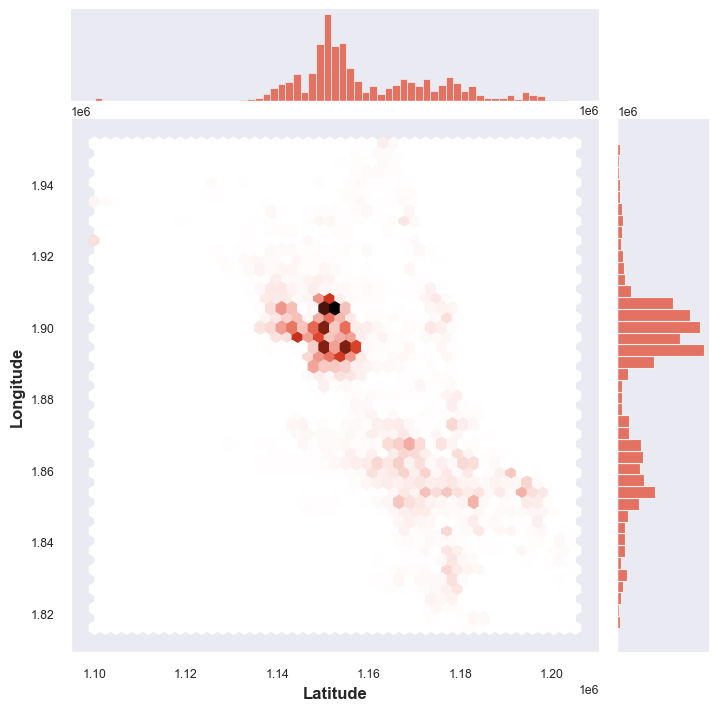

In [22]:
# let's take in the crime as an input as always
c = input("Enter the crime you wish to see the concentration of in the city >> ")
crime_df = df[df['Primary Type']==c.upper()]

sns.jointplot(x=crime_df['X Coordinate'].values, y=crime_df['Y Coordinate'].values, height=7, kind='hex')

plt.xlabel("Latitude", fontdict={'fontsize': 12}, weight='bold')
plt.ylabel("Longitude", fontdict={'fontsize': 12}, weight="bold")
plt.show()